In [1]:
# import the relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
NA = 6.023 * 10**23
R = 8.314

In [3]:
system_mat= ['PNCO', 'LTNO']
nano_mat = ['Au', 'NiO']
voxel_size = [500]
particle_sizes = [x for x in range(1, 21) if x%2 == 0]
#particle_count = []
lattice_misfit_E1 = [0.039, 0.07]
#lattice_parameter_M
#lattice_aP
#particle_diameter = [1,5,10,15,20,25,30,35,40]
#particle_dcentre
particle_distedges = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
young_modulus = 140
poisson_num = 0.3
position_z = [-25, -22.5, -20, -17.5, -15, -12.5, -10, -7.5, -5,-2.5, 0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25]
#migration_vol1, migration_vol2 = 7.5, 4.6
#crystalconst_fcc = 4
#dist_factor, df_edge, face_diagonal = 1, 2 , 3

In [4]:
position_z

particle_sizes

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [5]:
import math
strain_decay_rates = []
for particle_size in particle_sizes:
    decay = 1/8 * math.pi * particle_size * (math.sqrt(2/3 * (1 - poisson_num)/(1 + poisson_num)))
    strain_decay_rates.append(decay)
    
strain_decay_rates

[0.47056713875463374,
 0.9411342775092675,
 1.4117014162639012,
 1.882268555018535,
 2.3528356937731685,
 2.8234028325278024,
 3.293969971282436,
 3.76453711003707,
 4.235104248791703,
 4.705671387546337]

In [6]:
hier_index = pd.MultiIndex.from_product([nano_mat, particle_sizes, particle_distedges], names=["Nanomaterial", "Diameter", "InterDistance"])
hier_index

MultiIndex([( 'Au',  2,  5),
            ( 'Au',  2, 10),
            ( 'Au',  2, 15),
            ( 'Au',  2, 20),
            ( 'Au',  2, 25),
            ( 'Au',  2, 30),
            ( 'Au',  2, 35),
            ( 'Au',  2, 40),
            ( 'Au',  2, 45),
            ( 'Au',  2, 50),
            ...
            ('NiO', 20,  5),
            ('NiO', 20, 10),
            ('NiO', 20, 15),
            ('NiO', 20, 20),
            ('NiO', 20, 25),
            ('NiO', 20, 30),
            ('NiO', 20, 35),
            ('NiO', 20, 40),
            ('NiO', 20, 45),
            ('NiO', 20, 50)],
           names=['Nanomaterial', 'Diameter', 'InterDistance'], length=200)

In [7]:
df = pd.DataFrame(np.zeros((200,21)), index=hier_index, columns=pd.MultiIndex.from_product([position_z], names=["Position"]))
for particle_size in particle_sizes:
    for strain_decay_rate in strain_decay_rates:
        for particle_distedge in particle_distedges:
            for position in position_z:
                if math.sqrt(position**2) * 2 <= particle_distedge:
                    vari = math.cosh(position/strain_decay_rate) / math.cosh(particle_distedge/(2*strain_decay_rate))
                    #if position == df:
                    df.loc['Au'].loc[particle_size].loc[particle_distedge][position] = vari
                    df.loc['NiO'].loc[particle_size].loc[particle_distedge][position] = vari
df

Position                            -25.0     -22.5     -20.0     -17.5  \
Nanomaterial Diameter InterDistance                                       
Au           2        5               0.0  0.000000  0.000000  0.000000   
                      10              0.0  0.000000  0.000000  0.000000   
                      15              0.0  0.000000  0.000000  0.000000   
                      20              0.0  0.000000  0.000000  0.000000   
                      25              0.0  0.000000  0.000000  0.000000   
...                                   ...       ...       ...       ...   
NiO          20       30              0.0  0.000000  0.000000  0.000000   
                      35              0.0  0.000000  0.000000  1.000000   
                      40              0.0  0.000000  1.000000  0.588082   
                      45              0.0  1.000000  0.587934  0.345753   
                      50              1.0  0.587883  0.345636  0.203262   

Position                                -15.0     -12.5     -10.0     -7.5   \
Nanomaterial Diameter InterDistance                                           
Au           2        5              0.000000  0.000000  0.000000  0.000000   
                      10             0.000000  0.000000  0.000000  0.000000   
                      15             0.000000  0.000000  0.000000  1.000000   
                      20             0.000000  0.000000  1.000000  0.603509   
                      25             0.000000  1.000000  0.593315  0.358071   
...                                       ...       ...       ...       ...   
NiO          20       30             1.000000  0.589748  0.349907  0.211172   
                      35             0.588510  0.347073  0.205924  0.124277   
                      40             0.346092  0.204107  0.121100  0.073085   
                      45             0.203479  0.120002  0.071199  0.042969   
                      50             0.119622  0.070547  0.041857  0.025261   

Position                                -5.0      -2.5   ...      2.5   \
Nanomaterial Diameter InterDistance                      ...             
Au           2        5              0.000000  1.000000  ...  1.000000   
                      10             1.000000  0.706618  ...  0.706618   
                      15             0.631977  0.446567  ...  0.446567   
                      20             0.381404  0.269507  ...  0.269507   
                      25             0.226293  0.159903  ...  0.159903   
...                                       ...       ...  ...       ...   
NiO          20       30             0.133456  0.094302  ...  0.094302   
                      35             0.078540  0.055498  ...  0.055498   
                      40             0.046188  0.032637  ...  0.032637   
                      45             0.027156  0.019189  ...  0.019189   
                      50             0.015964  0.011281  ...  0.011281   

Position                                 5.0       7.5       10.0      12.5  \
Nanomaterial Diameter InterDistance                                           
Au           2        5              0.000000  0.000000  0.000000  0.000000   
                      10             1.000000  0.000000  0.000000  0.000000   
                      15             0.631977  1.000000  0.000000  0.000000   
                      20             0.381404  0.603509  1.000000  0.000000   
                      25             0.226293  0.358071  0.593315  1.000000   
...                                       ...       ...       ...       ...   
NiO          20       30             0.133456  0.211172  0.349907  0.589748   
                      35             0.078540  0.124277  0.205924  0.347073   
                      40             0.046188  0.073085  0.121100  0.204107   
                      45             0.027156  0.042969  0.071199  0.120002   
                      50             0.015964  0.025261  0.041857  0.070547   

Posit

In [8]:
lattice_misfit_E1[0]

0.039

In [9]:
df[0]

Position                                  0.0
Nanomaterial Diameter InterDistance          
Au           2        5              0.873762
                      10             0.617416
                      15             0.390193
                      20             0.235485
                      25             0.139717
...                                       ...
NiO          20       30             0.082398
                      35             0.048492
                      40             0.028517
                      45             0.016766
                      50             0.009857

[200 rows x 1 columns]

In [10]:
#for position in position_z:
    #df['quantity'] = df['quantity'].apply(lambda x: x*-1)
au = df.loc['Au'] * lattice_misfit_E1[0] * 100
au

Position               -25.0     -22.5     -20.0     -17.5     -15.0  \
Diameter InterDistance                                                 
2        5               0.0  0.000000  0.000000  0.000000  0.000000   
         10              0.0  0.000000  0.000000  0.000000  0.000000   
         15              0.0  0.000000  0.000000  0.000000  0.000000   
         20              0.0  0.000000  0.000000  0.000000  0.000000   
         25              0.0  0.000000  0.000000  0.000000  0.000000   
...                      ...       ...       ...       ...       ...   
20       30              0.0  0.000000  0.000000  0.000000  3.900000   
         35              0.0  0.000000  0.000000  3.900000  2.295191   
         40              0.0  0.000000  3.900000  2.293520  1.349761   
         45              0.0  3.900000  2.292942  1.348438  0.793570   
         50              3.9  2.292743  1.347981  0.792723  0.466526   

Position                   -12.5     -10.0     -7.5      -5.0      -2.5   ...  \
Diameter InterDistance                                                    ...   
2        5              0.000000  0.000000  0.000000  0.000000  3.900000  ...   
         10             0.000000  0.000000  0.000000  3.900000  2.755810  ...   
         15             0.000000  0.000000  3.900000  2.464711  1.741609  ...   
         20             0.000000  3.900000  2.353685  1.487475  1.051077  ...   
         25             3.900000  2.313930  1.396477  0.882542  0.623620  ...   
...                          ...       ...       ...       ...       ...  ...   
20       30             2.300019  1.364636  0.823570  0.520478  0.367779  ...   
         35             1.353585  0.803103  0.484680  0.306307  0.216442  ...   
         40             0.796019  0.472290  0.285031  0.180133  0.127286  ...   
         45             0.468007  0.277676  0.167580  0.105907  0.074835  ...   
         50             0.275133  0.163241  0.098517  0.062261  0.043994  ...   

Position                    2.5       5.0       7.5       10.0      12.5  \
Diameter InterDistance                                                     
2        5              3.900000  0.000000  0.000000  0.000000  0.000000   
         10             2.755810  3.900000  0.000000  0.000000  0.000000   
         15             1.741609  2.464711  3.900000  0.000000  0.000000   
         20             1.051077  1.487475  2.353685  3.900000  0.000000   
         25             0.623620  0.882542  1.396477  2.313930  3.900000   
...                          ...       ...       ...       ...       ...   
20       30             0.367779  0.520478  0.823570  1.364636  2.300019   
         35             0.216442  0.306307  0.484680  0.803103  1.353585   
         40             0.127286  0.180133  0.285031  0.472290  0.796019   
         45             0.074835  0.105907  0.167580  0.277676  0.468007   
         50             0.043994  0.062261  0.098517  0.163241  0.275133   

Position                    15.0      17.5      20.0      22.5  25.0  
Diameter InterDistance                                                
2        5              0.000000  0.000000  0.000000  0.000000   0.0  
         10             0.000000  0.000000  0.000000  0.000000   0.0  
         15             0.000000  0.000000  0.000000  0.000000   0.0  
         20             0.000000  0.000000  0.000000  0.000000   0.0  
         25             0.000000  0.000000  0.000000  0.000000   0.0  
...                          ...       ...       ...       ...   ...  
20       30             3.900000  0.000000  0.000000  0.000000   0.0  
         35             2.295191  3.900000  0.000000  0.000000   0.0  
         40             1.349761  2.293520  3.900000  0.000000   0.0  
         45             0.793570  1.348438  2.292942  3.900000   0.0  
         50             0.466526  0.792723  1.347981  2.292743   3.9  

[100 rows x 21 columns]

In [11]:
nio = df.loc['NiO'] * lattice_misfit_E1[1] * 100
nio

Position               -25.0     -22.5     -20.0     -17.5     -15.0  \
Diameter InterDistance                                                 
2        5               0.0  0.000000  0.000000  0.000000  0.000000   
         10              0.0  0.000000  0.000000  0.000000  0.000000   
         15              0.0  0.000000  0.000000  0.000000  0.000000   
         20              0.0  0.000000  0.000000  0.000000  0.000000   
         25              0.0  0.000000  0.000000  0.000000  0.000000   
...                      ...       ...       ...       ...       ...   
20       30              0.0  0.000000  0.000000  0.000000  7.000000   
         35              0.0  0.000000  0.000000  7.000000  4.119573   
         40              0.0  0.000000  7.000000  4.116574  2.422647   
         45              0.0  7.000000  4.115537  2.420274  1.424356   
         50              7.0  4.115179  2.419453  1.422837  0.837355   

Position                   -12.5     -10.0     -7.5      -5.0      -2.5   ...  \
Diameter InterDistance                                                    ...   
2        5              0.000000  0.000000  0.000000  0.000000  7.000000  ...   
         10             0.000000  0.000000  0.000000  7.000000  4.946326  ...   
         15             0.000000  0.000000  7.000000  4.423841  3.125966  ...   
         20             0.000000  7.000000  4.224563  2.669827  1.886548  ...   
         25             7.000000  4.153207  2.506498  1.584049  1.119318  ...   
...                          ...       ...       ...       ...       ...  ...   
20       30             4.128239  2.449347  1.478203  0.934191  0.660116  ...   
         35             2.429512  1.441467  0.869938  0.549781  0.388485  ...   
         40             1.428752  0.847701  0.511595  0.323316  0.228461  ...   
         45             0.840012  0.498392  0.300784  0.190089  0.134320  ...   
         50             0.493829  0.292996  0.176826  0.111750  0.078964  ...   

Position                    2.5       5.0       7.5       10.0      12.5  \
Diameter InterDistance                                                     
2        5              7.000000  0.000000  0.000000  0.000000  0.000000   
         10             4.946326  7.000000  0.000000  0.000000  0.000000   
         15             3.125966  4.423841  7.000000  0.000000  0.000000   
         20             1.886548  2.669827  4.224563  7.000000  0.000000   
         25             1.119318  1.584049  2.506498  4.153207  7.000000   
...                          ...       ...       ...       ...       ...   
20       30             0.660116  0.934191  1.478203  2.449347  4.128239   
         35             0.388485  0.549781  0.869938  1.441467  2.429512   
         40             0.228461  0.323316  0.511595  0.847701  1.428752   
         45             0.134320  0.190089  0.300784  0.498392  0.840012   
         50             0.078964  0.111750  0.176826  0.292996  0.493829   

Position                    15.0      17.5      20.0      22.5  25.0  
Diameter InterDistance                                                
2        5              0.000000  0.000000  0.000000  0.000000   0.0  
         10             0.000000  0.000000  0.000000  0.000000   0.0  
         15             0.000000  0.000000  0.000000  0.000000   0.0  
         20             0.000000  0.000000  0.000000  0.000000   0.0  
         25             0.000000  0.000000  0.000000  0.000000   0.0  
...                          ...       ...       ...       ...   ...  
20       30             7.000000  0.000000  0.000000  0.000000   0.0  
         35             4.119573  7.000000  0.000000  0.000000   0.0  
         40             2.422647  4.116574  7.000000  0.000000   0.0  
         45             1.424356  2.420274  4.115537  7.000000   0.0  
         50             0.837355  1.422837  2.419453  4.115179   7.0  

[100 rows x 21 columns]

In [18]:
y = []
for value in au.iloc[0].values:
    y.append(value)
        
def get_index_positions(list_of_elems, element):
    ''' Returns the indexes of all occurrences of give element in
    the list- listOfElements '''
    position_z = [-25, -22.5, -20, -17.5, -15, -12.5, -10, -7.5, -5,-2.5, 0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25]
    index_pos_list = []
    index_pos = 0
    while True:
        try:
            # Search for item in list from indexPos to the end of list
            index_pos = list_of_elems.index(element, index_pos)
            # Add the index position in list
            index_pos_list.append(index_pos)
            index_pos += 1
        except ValueError as e:
            break
    return index_pos_list
    
    
#get_index_positions(y, 0)
array = []
for num in range(21):
    if num not in get_index_positions(y, 0):
        array.append(num)
        x1 = [position_z[digit] for digit in array]
x1

[-2.5, 0, 2.5]

In [ ]:
get_index_positions(y, 0)

In [13]:
# create an array of y
y1 = []
for value in au.iloc[0].values:
    if value == 0:
        continue
    else:
        y1.append(value)
y1

[0, 1, 2, 3, 4, 5, 6, 7, 13, 14, 15, 16, 17, 18, 19, 20]

In [30]:
y = []
for value in au.iloc[1].values:
    y.append(value)
        
def get_index_positions(list_of_elems, element):
    ''' Returns the indexes of all occurrences of give element in
    the list- listOfElements '''
    position_z = [-25, -22.5, -20, -17.5, -15, -12.5, -10, -7.5, -5,-2.5, 0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25]
    index_pos_list = []
    index_pos = 0
    while True:
        try:
            # Search for item in list from indexPos to the end of list
            index_pos = list_of_elems.index(element, index_pos)
            # Add the index position in list
            index_pos_list.append(index_pos)
            index_pos += 1
        except ValueError as e:
            break
    return index_pos_list
    
    
#get_index_positions(y, 0)
array = []
for num in range(21):
    if num not in get_index_positions(y, 0):
        array.append(num)
        x2 = [position_z[digit] for digit in array]
x2


# create an array of y
y2 = []
for value in au.iloc[1].values:
    if value == 0:
        continue
    else:
        y2.append(value)
y2

[3.9, 2.7558103166758103, 2.4079216380051705, 2.7558103166758103, 3.9]

In [31]:
y = []
for value in au.iloc[2].values:
    y.append(value)
        
def get_index_positions(list_of_elems, element):
    ''' Returns the indexes of all occurrences of give element in
    the list- listOfElements '''
    position_z = [-25, -22.5, -20, -17.5, -15, -12.5, -10, -7.5, -5,-2.5, 0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25]
    index_pos_list = []
    index_pos = 0
    while True:
        try:
            # Search for item in list from indexPos to the end of list
            index_pos = list_of_elems.index(element, index_pos)
            # Add the index position in list
            index_pos_list.append(index_pos)
            index_pos += 1
        except ValueError as e:
            break
    return index_pos_list
    
    
#get_index_positions(y, 0)
array = []
for num in range(21):
    if num not in get_index_positions(y, 0):
        array.append(num)
        x3 = [position_z[digit] for digit in array]
x3


# create an array of y
y3 = []
for value in au.iloc[2].values:
    if value == 0:
        continue
    else:
        y3.append(value)
y3

[3.9,
 2.464711246177226,
 1.7416094050877164,
 1.5217516772063666,
 1.7416094050877164,
 2.464711246177226,
 3.9]

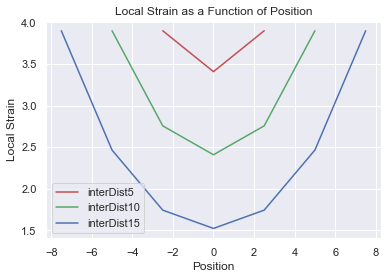

In [32]:
# Plot the curves
fig = plt.figure()
plt.plot(x1, y1, color='r', label='interDist5')
plt.plot(x2, y2, color='g', label='interDist10')
plt.plot(x3, y3, color='b', label='interDist15')
  
# Name the axes and the graph
plt.xlabel("Position")
plt.ylabel("Local Strain")
plt.title("Local Strain as a Function of Position")
  
# Add legend to recognize the curves
plt.legend()
  
# display the graph
plt.show()

In [33]:
fig.savefig('my_figure.png')

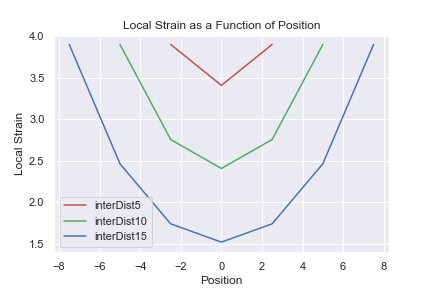

In [34]:
from IPython.display import Image
Image('my_figure.png')